Problem 1 &2 :I will first answer question number 2 that is to cluster users in to various groups. I am doing so because I am gonna need this information to answer question number 1

In [1]:
import pandas as pd
df = pd.read_csv("./data.csv", names=['Date','user_id','event','price','item_id','item_cat'],encoding='utf-8')

#Remove rows with NaN values
df.dropna(how='any',inplace=True)

#A number of rows have '-' in item_id column. These rows do not add value in item wise analysis. Remove these rows
df=df.loc[df['item_id']!='-']
df.head()

,Date,user_id,event,price,item_id,item_cat
0,2019-01-14,007e188b-63b2-4c0b-9c74-2eb5a4cb1d9b,addToCart,337,PR923AT55PMADFMX,women>outerwear>vests
1,2019-01-14,007e188b-63b2-4c0b-9c74-2eb5a4cb1d9b,addToCart,337,PR923AT55PMADFMX,women>outerwear>vests
2,2019-01-14,007e188b-63b2-4c0b-9c74-2eb5a4cb1d9b,addToCart,337,PR923AT09IUWDFMX,women>outerwear>vests
3,2019-01-14,007e188b-63b2-4c0b-9c74-2eb5a4cb1d9b,addToCart,117,MA194AT06LOBDFMX,boys>topwear>sweatshirts
4,2019-01-14,007e188b-63b2-4c0b-9c74-2eb5a4cb1d9b,addToCart,117,MA194AT06LOBDFMX,boys>topwear>sweatshirts


In [2]:
#Split the item category column in to individual categories, sub categories
df[['item_cat_0','item_cat_1','item_cat_2','item_cat_3']] = df['item_cat'].str.split('>',expand=True)

In [3]:
df.head()

,Date,user_id,event,price,item_id,item_cat,item_cat_0,item_cat_1,item_cat_2,item_cat_3
0,2019-01-14,007e188b-63b2-4c0b-9c74-2eb5a4cb1d9b,addToCart,337,PR923AT55PMADFMX,women>outerwear>vests,women,outerwear,vests,None
1,2019-01-14,007e188b-63b2-4c0b-9c74-2eb5a4cb1d9b,addToCart,337,PR923AT55PMADFMX,women>outerwear>vests,women,outerwear,vests,None
2,2019-01-14,007e188b-63b2-4c0b-9c74-2eb5a4cb1d9b,addToCart,337,PR923AT09IUWDFMX,women>outerwear>vests,women,outerwear,vests,None
3,2019-01-14,007e188b-63b2-4c0b-9c74-2eb5a4cb1d9b,addToCart,117,MA194AT06LOBDFMX,boys>topwear>sweatshirts,boys,topwear,sweatshirts,None
4,2019-01-14,007e188b-63b2-4c0b-9c74-2eb5a4cb1d9b,addToCart,117,MA194AT06LOBDFMX,boys>topwear>sweatshirts,boys,topwear,sweatshirts,None


In [4]:
#Fill the subcategories with NaN with 'NA'. NaN values create problems with a lot of methods and 
#algorithms hence it is better to replace these with a string
values={'item_cat_0':'NA','item_cat_1':'NA','item_cat_2':'NA','item_cat_3':'NA'}
df=df.fillna(value=values)

In [5]:
from sklearn.cluster import KMeans
import numpy as np


In [6]:
#Extract the seven columns required for clustering algorithm
X_df=df[['user_id','event','price','item_cat_0','item_cat_1','item_cat_2','item_cat_3']]

#Convert the categorical/ string data to int/float data. The Kmeans algo of sklearn doesn't accept categorical data
X_df['event']=X_df['event'].astype('category').cat.codes.values
X_df['item_cat_0']=X_df['item_cat_0'].astype('category').cat.codes.values
X_df['item_cat_1']=X_df['item_cat_1'].astype('category').cat.codes.values
X_df['item_cat_2']=X_df['item_cat_2'].astype('category').cat.codes.values
X_df['item_cat_3']=X_df['item_cat_3'].astype('category').cat.codes.values


C:\Users\gaura\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\gaura\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\gaura\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#

In [7]:
#Group the rows by user_id and aggregate (sum) the other numerical feature values 
X_df=X_df.groupby('user_id')['event','price','item_cat_0','item_cat_1','item_cat_2','item_cat_3'].sum()
X_df.shape

(361526, 6)

In [8]:
#Convert the data frame to numpy array
X=X_df[['event','price','item_cat_0','item_cat_1','item_cat_2','item_cat_3']].values
X.shape

(361526, 6)

In [9]:
#Define a kmeans clustering model and fit data
km = KMeans(
    n_clusters=10, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

We can do an elbow test to optimise the number of clusters. I am however taking 10 clusters for the analysis

In [10]:
#Count the number of distinct items in each group
for i in np.unique(y_km):
    count=y_km.tolist().count(i)
    print(count)

7885
23124
891
257353
2646
69228
20
3
281
95


In [11]:
#Add the cluster value as column and extract a separate dataframe with user_id and corresponding cluster
#this data frame will be used as a mapping table
X_df['cluster']=y_km
X_df=X_df.reset_index()
user_to_cluster=X_df[['user_id','cluster']]

In [12]:
user_to_cluster.head()

,user_id,cluster
0,00001bc3-56ef-49d4-8fce-f8114116df40,1
1,00008541-e38f-45eb-8203-b4f6f12b1ac8,3
2,000089b1-214b-45e3-bfdc-70acf2e98091,3
3,00013f5a-ab08-4699-b3da-4fec18b31ac3,5
4,0001908b-a639-41f7-86ff-b200d07a5120,5


In [13]:
#Add cluster to each row of dataframe.
df=df.merge(user_to_cluster,how='inner',on='user_id')

Clustering done. Now predicting CLTV for each cluster. This cluster information can be used to find out patterns, behaviours and forecasting. I have used the same data for predicting spend for these clusters to solve question number 1. Also, the data for every user is too less to make any meaningful analysis/ prediction.

In [14]:
#Remove the rows with page view as this information is not going to help understand CLTV or item demand.
# I AM ASSUMING HERE THAT 'ALL ADD TO CART' IS CONVERTED TO 'BUY' because there is no event
#such as remove from cart  and also the dataset with 'buy' event is too small.
df=df.loc[df['event']!='pageView']

In [15]:
#Check the date range of the datset
start_date=min(df['Date'])
end_date=max(df['Date'])
start_date,end_date

('2019-01-01', '2019-06-06')

In [16]:
#Check if all dates have atleast one corresponding row. This information is necessary for time series analysis
#which we will be doing the following two answers
date_range=pd.date_range(start_date,end_date).tolist()
len(df['Date'].unique()),len(date_range)

(157, 157)

In [18]:
day=list(range(1,len(date_range)+1))
len(day)

157

In [19]:
#Create a dataframe with all dates and corresponding week number for all dates in range
dates_df=pd.DataFrame({'Date':date_range,'day':day})

In [20]:
users=df.user_id.unique()
len(users),type(users)

(44099, numpy.ndarray)

In [21]:
#We can do the analysis for all clusters. I am choosing cluster 3 as some of the clusters do not have enough
#data points for data analysis. As discussed earlier we can optimise parameters to make sure that the clusters
#have enough members and those are balanced.
'''import random
cluster=random.randint(1,11)
print(cluster)'''

cluster=3

In [22]:
#Extract rows with specific cluster
df_cluster=df.loc[df['cluster']==cluster]
df_cluster.head()

,Date,user_id,event,price,item_id,item_cat,item_cat_0,item_cat_1,item_cat_2,item_cat_3,cluster
532,2019-01-30,014c4b3c-259a-414d-a6fc-7bcc07a8cc04,addToCart,229,YE305AT59BCUDFMX,women>topwear>blouses,women,topwear,blouses,NA,3
533,2019-01-30,014c4b3c-259a-414d-a6fc-7bcc07a8cc04,addToCart,229,YE305AT35BDSDFMX,women>topwear>blouses,women,topwear,blouses,NA,3
792,2019-01-28,0213a669-8005-4e0e-83ab-30ba5fcee0a8,addToCart,208,GU531AB99CRODFMX,men>innerwear>boxer,men,innerwear,boxer,NA,3
974,2019-01-31,039e3767-dc45-49d6-a38d-39f67e21839a,addToCart,279,SK303AT32BHRDFMX,women>dresses>others,women,dresses,others,NA,3
1060,2019-01-20,041a3a3e-8c18-4304-858b-5b4d06795bf0,addToCart,1299,TH934AT95SAUDFMX,women>outerwear>jackets,women,outerwear,jackets,NA,3


In [23]:
#Convert the Date column datatype
df_cluster=df_cluster.astype({'Date':'datetime64[ns]'})

In [24]:
#Merge the data frame with refrence table (dates and daynumber) just to make sure that some dates are not 
#skipped in the processing and also add day number for the time series analysis
df_cluster=dates_df.merge(df_cluster,how='left',on='Date')

In [25]:
#Fill the NaN
values={'cluster_id':cluster,'price':0}
df_cluster=df_cluster.fillna(value=values)

In [26]:
#Group by date and add the price to calculate total sales in that cluster on that date
df_cluster_group_by_date=df_cluster.groupby(['Date'])['price'].agg({'price':'sum'})
df_cluster_group_by_date.head()

C:\Users\gaura\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,price
Date,
2019-01-01,15732
2019-01-02,27616
2019-01-03,26823
2019-01-04,15317
2019-01-05,16448


In [27]:
#Add the week number to the dataframe. This will be used to 
df_cluster_group_by_date['day']=day

In [30]:
#Extract prices as numpy array as well as days
prices=df_cluster_group_by_date.price.values
days=df_cluster_group_by_date.day.values
prices,days,len(prices),len(days)

(array([ 15732,  27616,  26823,  15317,  16448,  12986,  40632,  35069,
         28273,  26362,  27843,  36201,  31482,  52863,  47809,  40605,
         34350,  33928,  19348,  25796,  30711,  31729,  46640,  43513,
         67330,  39884,  39762,  49363,  41936,  26014,  18833,  16362,
         20824,  31807,  42709,  39406,  32113,  32405,  26223,  35855,
         30981,  40393,  23505,  58060,  22269,  27931,  26883,  23872,
         43394,  34548,  37225,  30640,  25230,  40712,  41083,  35498,
         31253,  24992,  23557,  21515,  16371,  13930,  27908,  72489,
         48224,  43958,  25345,  26719,  14653,  41221,  65531,  44855,
         71997,  55956,  24461,  26779,  51254,  68223,  54423,  48678,
         33398,  24283,  22294,  32124,  61080,  52336,  39306,  16292,
         17684,  19951,  35589,  36975,  36588,  33075,  37153,  23109,
         18829,  27803,  44558,  55733,  43545,  25459,  28893,  12802,
         48770,  44219,  47458,  28525,  32444,  28840,  27748, 

In [31]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Do a linear regression of sales over day number
mod = smf.ols(formula='price ~ day', data=df_cluster_group_by_date)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     28.15
Date:                Tue, 20 Aug 2019   Prob (F-statistic):           3.83e-07
Time:                        18:31:27   Log-Likelihood:                -1792.9
No. Observations:                 157   AIC:                             3590.
Df Residuals:                     155   BIC:                             3596.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.416e+04   3557.148      6.791      0.0

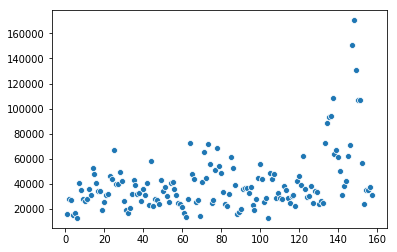

In [33]:
import seaborn as sns

sns.scatterplot(days,prices)

We can see here that the linear regression model doesn't fit well as Rsquared value is less. Same can be seen in 
plot above as well. We can analyse the data and predict sales using time series analysis methods such as Holt Winters or RNN. I will be using LSTMs in the analysis. However, best model can only be decided once we have tried various methods.

In [34]:
#Import the required libraries
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [35]:
# define a function to prepare dataset for LSTM
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
prices=prices.reshape(-1,1)
dataset = scaler.fit_transform(prices)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1 with a lookback period of 3. We can try various lookcack periods to decide
#best model.
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be -samples, time steps, features
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

C:\Users\gaura\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [36]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=1)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
101/101 [==============================] - 2s 17ms/step - loss: 0.0132
Epoch 2/50
101/101 [==============================] - 0s 2ms/step - loss: 0.0070
Epoch 3/50
101/101 [==============================] - 0s 2ms/step - loss: 0.0067
Epoch 4/50
101/101 [==============================] - 0s 2ms/step - loss: 0.0067
Epoch 5/50
101/101 [==============================] - 0s 2ms/step - loss: 0.0066
Epoch 6/50
101/101 [==============================] - 0s 2ms/step - loss: 0.0065
Epoch 7/50
101/101 [==============================] - 0s 2ms/step - loss: 0.0064
Epoch 8/50
101/101 [==============================] - 0s 2ms/step - loss: 0.0063
Epoch 9/50
101/101 [==============================] - 0s 2ms/step - loss: 0.0064
Epoch 10/50
101/101 [==============================] - 0s 2ms/step - loss: 0.0062
Epoch 11/50
101/101 [==============================] - 0s 2ms/step -

In [37]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

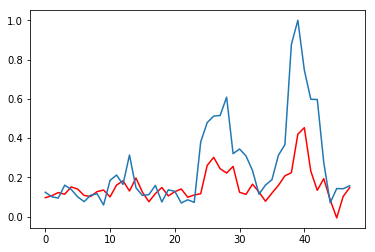

In [38]:
#Visualise actuals vs predictions
plt.plot(testPredict, color= 'red')
plt.plot(testY)
plt.show()

I will again use LSTM to predict the demand. The demand in turn can be used to plan inventory levels.
The data of individual items (item_id) is sparse and not enough for accurate predictions. Therefore I have aggregated the demand at first level of item categorisation. The sub category planning can be done accordingly based on other models or subjective assessment.

In [39]:
df.head()

,Date,user_id,event,price,item_id,item_cat,item_cat_0,item_cat_1,item_cat_2,item_cat_3,cluster
0,2019-01-14,007e188b-63b2-4c0b-9c74-2eb5a4cb1d9b,addToCart,337,PR923AT55PMADFMX,women>outerwear>vests,women,outerwear,vests,NA,0
1,2019-01-14,007e188b-63b2-4c0b-9c74-2eb5a4cb1d9b,addToCart,337,PR923AT55PMADFMX,women>outerwear>vests,women,outerwear,vests,NA,0
2,2019-01-14,007e188b-63b2-4c0b-9c74-2eb5a4cb1d9b,addToCart,337,PR923AT09IUWDFMX,women>outerwear>vests,women,outerwear,vests,NA,0
3,2019-01-14,007e188b-63b2-4c0b-9c74-2eb5a4cb1d9b,addToCart,117,MA194AT06LOBDFMX,boys>topwear>sweatshirts,boys,topwear,sweatshirts,NA,0
4,2019-01-14,007e188b-63b2-4c0b-9c74-2eb5a4cb1d9b,addToCart,117,MA194AT06LOBDFMX,boys>topwear>sweatshirts,boys,topwear,sweatshirts,NA,0


In [40]:
items=df.item_id.unique()

In [41]:
item=np.random.choice(items)

In [42]:
item

'AE745AT60FLFDFMX'

In [43]:
df_item=df.loc[df['item_id']==item]

In [44]:
len(df_item['Date'].unique())

17

As we can see above the number of data points for single item are too less

In [45]:
categories=df.item_cat_0.unique()
#cat_0=np.random.choice(categories)
cat_0='women'
df_0=df.loc[df['item_cat_0']==cat_0]
len(df_0['Date'].unique())

157

In [46]:
df_0=df_0.astype({'Date':'datetime64[ns]'})
df_0=dates_df.merge(df_0,how='left',on='Date')
#values={'item_cat_0':cat_0,'price':0}
#df_0=df_0.fillna(value=values)

In [47]:
df_0_group_by_date=df_0.groupby(['Date'])['item_cat_0'].size().reset_index(name ='demand')
#df = df.groupby('Id', sort=False)["Amount"].sum()
df_0_group_by_date.head()

,Date,demand
0,2019-01-01,153
1,2019-01-02,305
2,2019-01-03,344
3,2019-01-04,154
4,2019-01-05,195


In [48]:
demand=df_0_group_by_date.demand.values
demand=demand.reshape(-1,1)

In [49]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))

dataset = scaler.fit_transform(demand)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

C:\Users\gaura\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [50]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 1s - loss: 0.0048
Epoch 2/100
 - 0s - loss: 0.0031
Epoch 3/100
 - 0s - loss: 0.0031
Epoch 4/100
 - 0s - loss: 0.0030
Epoch 5/100
 - 0s - loss: 0.0030
Epoch 6/100
 - 0s - loss: 0.0029
Epoch 7/100
 - 0s - loss: 0.0029
Epoch 8/100
 - 0s - loss: 0.0028
Epoch 9/100
 - 0s - loss: 0.0027
Epoch 10/100
 - 0s - loss: 0.0027
Epoch 11/100
 - 0s - loss: 0.0028
Epoch 12/100
 - 0s - loss: 0.0027
Epoch 13/100
 - 0s - loss: 0.0027
Epoch 14/100
 - 0s - loss: 0.0026
Epoch 15/100
 - 0s - loss: 0.0026
Epoch 16/100
 - 0s - loss: 0.0026
Epoch 17/100
 - 0s - loss: 0.0026
Epoch 18/100
 - 0s - loss: 0.0025
Epoch 19/100
 - 0s - loss: 0.0026
Epoch 20/100
 - 0s - loss: 0.0026
Epoch 21/100
 - 0s - loss: 0.0025
Epoch 22/100
 - 0s - loss: 0.0025
Epoch 23/100
 - 0s - loss: 0.0025
Epoch 24/100
 - 0s - loss: 0.0025
Epoch 25/100
 - 0s - loss: 0.0025
Epoch 26/100
 - 0s - loss: 0.0026
Epoch 27/100
 - 0s - loss: 0.0025
Epoch 28/100
 - 0s - loss: 0.0025
Epoch 29/100
 - 0s - loss: 0.0026
Epoch 30/100
 - 0s - lo

In [51]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

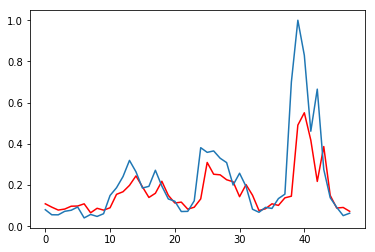

In [52]:
plt.plot(testPredict, color= 'red')
plt.plot(testY)
plt.show()

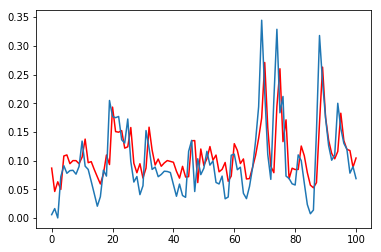

In [53]:
plt.plot(trainPredict, color= 'red')
plt.plot(trainY)
plt.show()

************************************************************

Now answering problem 4 for making recommendations for a cart. I have used embeddings to learn latent features of every item in the database and establish ite-item similarity. The approach I have used is an item2vec approach. with this we learn features for every item in 50 dimension space and then recommend items to user based on already existing items in her cart.

In [54]:
#Read the csv file again
df = pd.read_csv("./data.csv", names=['Date','user_id','event','price','item_id','item_cat'],encoding='utf-8')

Taking a 50% fraction of the dataset as, processing the entire dataset for this problem will take very long. For the actual purpose we may like to process the data on multiple nodes or use a compiled language for faster processing time expensive loops

In [55]:
df=df.sample(frac=.5)

In [56]:
len(df.item_id.unique()),len(df.user_id.unique())

(10203, 633584)

In [57]:
#Drop NaN and '-' values from the data
df.dropna(how='any',inplace=True)

df=df.loc[df['item_id']!='-']

dates=df.Date.unique()
users=df.user_id.unique()
items=df.item_id.unique()
len(df.item_id.unique()),len(df.user_id.unique()),len(df.Date.unique())

(7570, 266107, 190)

Create various carts. I am assuming here that a users comes to the platform/app only once a day hence I have put all addToCart and buy of a particular user on a particular day in one cart.

In [58]:
all_carts=list(df.groupby(['Date','user_id'])['item_id'].unique())

In [59]:
#Remove carts with zero items
all_carts_valid= [x for x in all_carts if x != []]

C:\Users\gaura\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
C:\Users\gaura\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  


In [60]:
#Create various combinations of two items occuring together in a cart. This will help calculate how often
#are certain items bought/put in cart together and eventually calculate the similarity of items


from  itertools import combinations
import time
all_combo=[]
st=time.time()
for cart in all_carts_valid:
    combo=list(combinations((e for e in cart), 2))
    all_combo=all_combo+combo
en=time.time()
print (en-st)

4668.142346382141


The above step is the most time consuming step in the entire analysis. I would like to do this in a faster way but haven't come up with a better solution so far

In [61]:
max(len(cart) for cart in all_carts_valid),len(all_combo)

(478, 2191606)

In [62]:
#Create two lists of items in occuring at first and second place of various item combinations
item_1=[]
item_2=[]
for i in range(len(all_combo)):
    item_1.append(all_combo[i][0])
    item_2.append(all_combo[i][1])

In [63]:
#Create a data frame of various combinations of the items 
df_item_item=pd.DataFrame({'item_1':item_1,'item_2':item_2})

#Save the dataframe as the previous steps are time consuming and reconstructing this data frame 
df_item_item.to_csv("./item_item.csv")

In [64]:
df_item_item=pd.read_csv("./item_item.csv")

In [65]:
#This step is done to sort the order of items in the two columns. This will help make correct count of various
#item combinations i.e. [A,B] will not be counted separate from [B,A]

item_1=[]
item_2=[]
for i in range(len(df_item_item)):
    x=df_item_item.loc[i][df_item_item.columns.get_loc('item_1')]
    y=df_item_item.loc[i][df_item_item.columns.get_loc('item_2')]
    z=sorted([x,y])  
    item_1.append(z[0])
    item_2.append(z[1])

In [66]:
df_item_item['item_1']=item_1
df_item_item['item_2']=item_2

In [67]:
df_item_item.columns

Index(['Unnamed: 0', 'item_1', 'item_2'], dtype='object')

In [68]:
df_item_item=df_item_item.drop(columns='Unnamed: 0')

In [69]:
#Group various item-item combinations and count such occurences
df_item_item_grouped=df_item_item.groupby(['item_1','item_2']).size()
df_item_item_grouped=df_item_item_grouped.reset_index()
df_item_item_grouped.columns=['item_1','item_2','count']
df_item_item_grouped.head()

,item_1,item_2,count
0,AD096AB18TBTDFMX,AD096AB63MZGDFMX,2
1,AD096AB18TBTDFMX,AD096AB66MZDDFMX,1
2,AD096AB18TBTDFMX,AD096AB68MZBDFMX,3
3,AD096AB18TBTDFMX,AD096AB69MZADFMX,2
4,AD096AB18TBTDFMX,AD096AC79RUQDFMX,2


In [70]:
#List all unique items and corresponding numerical code for these items and put these in to a dataframe.
#This data frame will be used as a look table
all_items_unique=list(set((item_1+item_2)))
all_items_unique_code=list(range(len(all_items_unique)))
len(all_items_unique),len(all_items_unique_code)
df_item_to_code=pd.DataFrame({'item_id':all_items_unique,'item_code':all_items_unique_code})
df_item_to_code.head()

,item_id,item_code
0,VA625SH90MPPDFMX,0
1,EC005AT88SVFDFMX,1
2,CA152AT56XXRDFMX,2
3,RE924AT59WSIDFMX,3
4,KA413AT99GOQDFMX,4


In [71]:
#Merge the two dataframes to get corresponding numerical item codes. It is necessary to do this because 
#keras/tensorflow will not process string data.
df_item_item_grouped=df_item_item_grouped.merge(df_item_to_code,how='left',left_on='item_1',right_on='item_id')
df_item_item_grouped.rename(columns={'item_code':'item_1_code'})
df_item_item_grouped=df_item_item_grouped.merge(df_item_to_code,how='left',left_on='item_2',right_on='item_id')
df_item_item_grouped.rename(columns={'item_code':'item_2_code'})

,item_1,item_2,count,item_id_x,item_code_x,item_id_y,item_code_y
0,AD096AB18TBTDFMX,AD096AB63MZGDFMX,2,AD096AB18TBTDFMX,3942,AD096AB63MZGDFMX,4518
1,AD096AB18TBTDFMX,AD096AB66MZDDFMX,1,AD096AB18TBTDFMX,3942,AD096AB66MZDDFMX,3304
2,AD096AB18TBTDFMX,AD096AB68MZBDFMX,3,AD096AB18TBTDFMX,3942,AD096AB68MZBDFMX,148
3,AD096AB18TBTDFMX,AD096AB69MZADFMX,2,AD096AB18TBTDFMX,3942,AD096AB69MZADFMX,1848
4,AD096AB18TBTDFMX,AD096AC79RUQDFMX,2,AD096AB18TBTDFMX,3942,AD096AC79RUQDFMX,3050
5,AD096AB18TBTDFMX,AD096AC80RUPDFMX,3,AD096AB18TBTDFMX,3942,AD096AC80RUPDFMX,675
6,AD096AB18TBTDFMX,AD096AC82RUNDFMX,1,AD096AB18TBTDFMX,3942,AD096AC82RUNDFMX,5124
7,AD096AB18TBTDFMX,AD096AC83RUMDFMX,1,AD096AB18TBTDFMX,3942,AD096AC83RUMDFMX,4487
8,AD096AB18TBTDFMX,AD096AC86RUJDFMX,1,AD096AB18TBTDFMX,3942,AD096AC86RUJDFMX,3531
9,AD096AB18TBTDFMX,AD096AC88RUHDFMX,2,AD096AB18TBTDFMX,3942,AD096AC88RUHDFMX,2200


In [72]:
#drop unnecessary columns
df_item_item_grouped=df_item_item_grouped.drop(columns=['item_id_x','item_id_y'])
df_item_item_grouped.head()

,item_1,item_2,count,item_code_x,item_code_y
0,AD096AB18TBTDFMX,AD096AB63MZGDFMX,2,3942,4518
1,AD096AB18TBTDFMX,AD096AB66MZDDFMX,1,3942,3304
2,AD096AB18TBTDFMX,AD096AB68MZBDFMX,3,3942,148
3,AD096AB18TBTDFMX,AD096AB69MZADFMX,2,3942,1848
4,AD096AB18TBTDFMX,AD096AC79RUQDFMX,2,3942,3050


In [73]:
#Interchange the item_id and item_code columns and concat to make sure that all items codes are 
#passed through the model
df_item_item_grouped_repeat=pd.DataFrame({'item_1':df_item_item_grouped['item_2'],
                                         'item_2':df_item_item_grouped['item_1'],
                                         'count':df_item_item_grouped['count'],
                                         'item_code_x':df_item_item_grouped['item_code_y'],
                                         'item_code_y':df_item_item_grouped['item_code_x']})

frames=[df_item_item_grouped,df_item_item_grouped_repeat]

df_item_item_grouped=pd.concat(frames)

In [74]:
from keras.models import load_model
from keras import regularizers
from keras.models import Sequential, Model
from keras.layers import Embedding, Reshape, Activation, Input, Dense, Flatten, Dropout
from keras.layers.merge import Dot, Concatenate
from keras.utils import np_utils
from keras.utils.data_utils import get_file
from collections import defaultdict
from sklearn.model_selection import train_test_split

In [75]:
n_items_1,n_items_2 = len(df_item_item_grouped.item_code_x.unique()),len(df_item_item_grouped.item_code_y.unique())  
max_items_1,max_items_2=max(df_item_item_grouped.item_code_x),max(df_item_item_grouped.item_code_y)

In [76]:
#Define and compile the model. Both columns containing containing the item codes are passed through
#embedding layers. I am merging the two layers through dot product but we can try other combinations
#and optimise the model by hyper parameter tuning.
item_1_input = Input(shape=[1], name="item_1_input")
item_1_embedding = Embedding(max_items_1+1,50,  name="item_1_embedding")(item_1_input)
        
item_1_vec = Flatten(name="flatten_item_1")(item_1_embedding)

item_2_input = Input(shape=[1], name="item_2_input")
item_2_embedding = Embedding(max_items_2+1,50,  name="item_2_embedding")(item_2_input)
        
item_2_vec = Flatten(name="flatten_item_2")(item_2_embedding)

product_layer = Dot(name="Dot",axes=1)([item_1_vec, item_2_vec])

        
output_connected_layer = Dense(1,activation ='linear')(product_layer)

model = Model([item_1_input, item_2_input],output_connected_layer)
model.compile(loss='mse', optimizer='adam', metrics=["mae"])

In [77]:
#prepare the data for training
X_1=np.array(df_item_item_grouped.item_code_x)
X_1=np.reshape(X_1,(X_1.shape[0],1))
X_2=np.array(df_item_item_grouped.item_code_y)
X_2=np.reshape(X_2,(X_2.shape[0],1))
y=np.array(df_item_item_grouped['count'])
y=np.reshape(y,(y.shape[0],1))

In [78]:
#Train the model. I am training for only one epoch but based on error values the epochs need to be increased
model.fit([X_1, X_2], y, epochs= 1, verbose=1,validation_split=0.1)
model.save('item_item_similarity.h5')

Train on 2565783 samples, validate on 285087 samples
Epoch 1/1
2565783/2565783 [==============================] - 930s 363us/step - loss: 6.2088 - mean_absolute_error: 0.7636 - val_loss: 29.1966 - val_mean_absolute_error: 0.9848


In [79]:
model.layers[2].name

'item_1_embedding'

In [80]:
#extract the embedding weights from the embedding layer
weights=model.layers[2].get_weights()
print(weights)

[array([[ 0.04284821, -0.02404456, -0.17615974, ...,  0.01172136,
         0.02896572,  0.17987937],
       [ 0.394389  , -0.12193815, -0.21055283, ..., -0.11045051,
        -0.05105712,  0.37751386],
       [ 0.18561314, -0.3223406 , -0.14832127, ...,  0.11259539,
         0.03964197,  0.28062668],
       ...,
       [ 0.3518164 , -0.09994531, -0.21642943, ..., -0.0414126 ,
        -0.0691138 ,  0.21819484],
       [ 0.22835977, -0.1851176 , -0.29126665, ..., -0.09025272,
         0.09778722,  0.19706368],
       [ 0.19658005, -0.18518658, -0.26278633, ..., -0.0608848 ,
         0.14706078,  0.15895277]], dtype=float32)]


In [81]:
#Prepare the data for training another model that will learn cart feature based on which items are already
#there in the cart. I have taken cart size as 5 items but it can be any number except 0.
items_in_cart=np.random.choice(all_items_unique_code,5)
cart=np.repeat(1,len(items_in_cart))
items_in_cart=np.reshape(items_in_cart,(items_in_cart.shape[0],1))
cart=np.reshape(cart,(cart.shape[0],1))
output=cart
items_in_cart.shape,cart.shape,output.shape

((5, 1), (5, 1), (5, 1))

In [82]:
#define and compile the model 
items_input = Input(shape=[1], name="items_input")
items_embedding = Embedding(max_items_1+1,50,  name="items_embedding",weights=weights,trainable=False)(items_input)
        
items_vec = Flatten(name="flatten_items")(items_embedding)

cart_input = Input(shape=[1], name="cart_input")
cart_embedding = Embedding(max_items_2+1,50,  name="cart_embedding")(cart_input)
        
cart_vec = Flatten(name="flatten_item_2")(cart_embedding)

product_layer = Dot(name="Dot",axes=1)([items_vec, cart_vec])

        
output_connected_layer = Dense(1,activation ='linear')(product_layer)

model_1 = Model([items_input, cart_input],output_connected_layer)
model_1.compile(loss='mse', optimizer='adam', metrics=["mae"])

In [83]:
#train the model
model_1.fit([items_in_cart,cart], output, epochs= 1, verbose=1,validation_split=0.1)
model_1.save('item_cart.h5')

Train on 4 samples, validate on 1 samples
Epoch 1/1
4/4 [==============================] - 1s 143ms/step - loss: 0.9709 - mean_absolute_error: 0.9851 - val_loss: 0.9729 - val_mean_absolute_error: 0.9863


In [84]:
#prepare the data for making predictions for the next recommended item for the cart
cart=np.repeat(1,len(all_items_unique_code))
items=np.array(all_items_unique_code)
items=np.reshape(items,(items.shape[0],1))
cart=np.reshape(cart,(cart.shape[0],1))

In [85]:
#recommend the next items in the cart
predictions=model.predict([items,cart])
predictions=predictions.tolist()

In [87]:
recommended_df=pd.DataFrame({'item_code':all_items_unique_code,'item_id':all_items_unique,'prediction':predictions})
recommended_df=recommended_df.sort_values(by=['prediction'],ascending=False)

In [88]:
#top 10 recommended items for the cart
recommended_items=recommended_df.head(10).item_id

In [89]:
recommended_items

6748    CU824AT10TUJDFMX
2162    GU531AC58GMJDFMX
3571    NA379AT65THUDFMX
4221    LO850AT52RZRDFMX
3436    LO850AT94RYBDFMX
5045    NA379AT72YRVDFMX
7102    LE063AT26SZTDFMX
1326    MA486AT79YLWDFMX
884     TO253AB35MDGDFMX
3637    ST089SH23AVODFMX
Name: item_id, dtype: object